In [320]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.linear_model
import sklearn.neighbors
import sklearn.datasets
import matplotlib.pyplot as plt

In [321]:
oecd_bli = pd.read_csv("oecd_bli_2015.csv", thousands=',')
income_inequality = pd.read_csv("income_inequality.csv")

In [322]:
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="LOCATION", columns="Indicator", values="Value")
income_inequality.rename(columns={"Value": "Gini Value"}, inplace=True)
income_inequality.set_index("LOCATION", inplace=True)
full_country_stats = pd.merge(left=oecd_bli, right=income_inequality, 
                              left_index=True, right_index=True)
full_country_stats.sort_values(by="Gini Value", inplace=True)
country_stats = full_country_stats
country_stats = country_stats.drop(['USA','EST','CHL'])
#country_stats.head()

In [306]:
X = np.c_[country_stats["Gini Value"]]
y = np.c_[country_stats["Homicide rate"]]

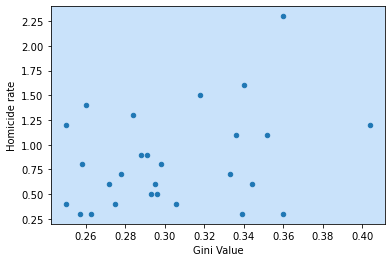

In [323]:
country_stats.plot(kind='scatter', x="Gini Value", 
                   y='Homicide rate').set_facecolor("#C9E2FA")
plt.show()

In [308]:
model = sklearn.linear_model.LinearRegression()
model.fit(X, y)

LinearRegression()

<ipython-input-329-9306ad1d9171>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_facecolor("#C9E2FA")


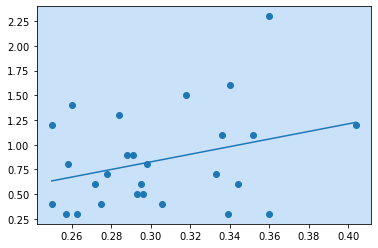

In [329]:
plt.scatter(X, y)
plt.plot(X, model.predict(X))
plt.axes().set_facecolor("#C9E2FA")
plt.show()

In [324]:
X_new = [[0.333]] # Italy's Gini Value
print("Predicted homicide rate for Italy (ITA):", model.predict(X_new))
print("Real data:")
country_stats.loc['ITA'][['Gini Value', 'Homicide rate']].to_frame()

Predicted homicide rate for Italy (ITA): [[0.95356595]]
Real data:


,ITA
Gini Value,0.333
Homicide rate,0.7
